<img src="https://citinews.net/uploads/2022/03/17/images/gui-tien-tiet-kiem-online-mbbank.jpg" width="600" height="200" style="display:block; margin:auto"/>

<h1 align="center"> Churn customers in using “Heo Số” service in the mobile banking application  - Group 7</h1>

## Table of Contents
1. [Introduction](#1.-Introduction)
2. [Import and Loading Data](#2.-Importing-and-Loading-Dataset)
3. [Exploratory Data Analysis](#3.-Explorary-Data-Analysis)
    1. [Numerical Columns](#3.1.-Numerical-columns)
    2. [Categorical Columns](#3.2.-Categorical-Columns)
4. [Data Preprocessing](#4.-Data-Preprocessing)
5. [Predictive Modeling](#5.-Predictive-Modeling)
6. [Features importance and recommendations for the bank](#6.-Feature-Importance-and-recommendation-for-the-bank)
7. [References](#7.-References)

# 1. Introduction

This research aims to **explore and define the concept of churn customers** within the context of customers **utilizing the "Heo So" service.**
In this particular study, the **definition of a churn customer** has been established based on specific criteria. 
The analysis relies on the recorded data from the system, specifically **focusing on two key factors: the decrease in the number of customer logins on the "Heo Số" app and the customer's savings balance on the same app.** 
By observing changes in these variables between March 2021 and June 2021, churn customers can be identified within the dataset.

#### Dataset Description
The dataset is derived from the actual database of a commercial bank in Vietnam. The collection in the review is information on history of payments, transactions, demographic factors and preferences of customers, **a total of 100,000 records in 2021**. 
In order to improve the accuracy of the research object of the topic, we **filtered out the information of customers using the 'Heo Số' application with a total of 7,592 customers using the service**, equivalent to 7,592 observations for this dataset.

# 2. Importing and Loading Dataset

## 2.1. Import Libraries

In [102]:
#Import basic libraries
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#%matplotlib inline
#pd.set_option('display.max_columns',None)
#sns.set(palette="pastel", color_codes=True)
#sns.set_context('paper')

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio


from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
#from lightgbm import LGBMRegressor,log_evaluation
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn import ensemble, metrics, model_selection, linear_model
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score,classification_report, precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


## 2.2. Load dataset

In [103]:
df = pd.read_csv('dataset.csv')

In [104]:
df.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Filter out people who use HeoSo service

In [105]:
df = df.dropna(subset=['totalSavings2021_heoSo'])

#### Trim the white space from column header

In [106]:
df.columns = df.columns.str.strip()

#### Check the data types

In [107]:
df.dtypes

local_ref_1                      object
vn_marital_status                object
resid_province                  float64
resid_district                  float64
resid_wards                     float64
birth_incorp_date               float64
amount_week                     float64
max_amount_week                 float64
min_amount_week                 float64
distinct_payment_code_week      float64
count_payment_code_week         float64
distinct_trans_group_week       float64
distinct_ref_no_week            float64
amount_month                    float64
max_amount_month                float64
min_amount_month                float64
distinct_payment_code_month     float64
count_payment_code_month        float64
distinct_trans_group_month      float64
distinct_ref_no_month           float64
amount_3month                   float64
max_amount_3month               float64
min_amount_3month               float64
distinct_payment_code_3month      int64
count_payment_code_3month         int64


In [108]:
df.isnull().sum()/len(df)

local_ref_1                     0.018177
vn_marital_status               0.019889
resid_province                  0.042150
resid_district                  0.042281
resid_wards                     0.042281
birth_incorp_date               0.000000
amount_week                     0.186776
max_amount_week                 0.186776
min_amount_week                 0.186776
distinct_payment_code_week      0.169784
count_payment_code_week         0.169784
distinct_trans_group_week       0.169784
distinct_ref_no_week            0.169784
amount_month                    0.048340
max_amount_month                0.048340
min_amount_month                0.048340
distinct_payment_code_month     0.030427
count_payment_code_month        0.030427
distinct_trans_group_month      0.030427
distinct_ref_no_month           0.030427
amount_3month                   0.026475
max_amount_3month               0.026475
min_amount_3month               0.026475
distinct_payment_code_3month    0.000000
count_payment_co

**Note:** We will drop columns with high percentage of null values and the rd_id column

In [109]:
df.columns = df.columns.str.strip()
df = df.drop(['balanceJuin2021', 'nominal_interestJuin2021', 'real_interestJuin2021', 'nhomno_xhtdJuin2021', 'categoryJuin2021', 'sub_productJuin2021', 'loaikyhanJuin2021', 'sectorJuin2021','product_codeJuin2021', 'rd_id'], axis = 1)

#### Change columns names

In [110]:
#correct columns names
df.columns = df.columns.str.replace("juin", "june")
df.columns = df.columns.str.replace("Juin", "June")


In [111]:
df.isnull().sum()

local_ref_1                      138
vn_marital_status                151
resid_province                   320
resid_district                   321
resid_wards                      321
birth_incorp_date                  0
amount_week                     1418
max_amount_week                 1418
min_amount_week                 1418
distinct_payment_code_week      1289
count_payment_code_week         1289
distinct_trans_group_week       1289
distinct_ref_no_week            1289
amount_month                     367
max_amount_month                 367
min_amount_month                 367
distinct_payment_code_month      231
count_payment_code_month         231
distinct_trans_group_month       231
distinct_ref_no_month            231
amount_3month                    201
max_amount_3month                201
min_amount_3month                201
distinct_payment_code_3month       0
count_payment_code_3month          0
distinct_trans_group_3month        0
distinct_ref_no_3month             0
m

## 3.2. Missing values handling

In [112]:
#drop missing values of categorical columns
df = df.dropna(subset=['local_ref_1','vn_marital_status','most_act_mar2021','most_act_june2021'])

In [113]:
#drop columns that have little effect on the churn 
df = df.drop(['resid_district','resid_wards','amount_week','max_amount_week','min_amount_week',
              'distinct_payment_code_week','distinct_trans_group_week','distinct_ref_no_week',
             'distinct_payment_code_month','distinct_trans_group_month','distinct_ref_no_month'], axis = 1)

In [114]:
#change the 'regid_province' column into region column having 4 values: 'Northern', 'Central', 'Southern',and 'Unknown'
df['region'] = df['resid_province'].apply(lambda x: 'Unknown' if pd.isna(x) else ('Northern' if 0 <= x <= 37 else ('Central' if 38 <= x <= 68 else ('Southern' if 70 <= x <= 96 else None))))

In [115]:
#Change the birth column into age
df['age'] = 2021 - df['birth_incorp_date']
df = df.drop('birth_incorp_date', axis = 1)

In [116]:
df = df.dropna(subset=['most_act_mar2021_count', 'total_act_mar2021', 'total_amt_mar2021', 'most_act_june2021_count', 'total_act_june2021', 'total_amt_june2021',
            'amount_month','max_amount_month','min_amount_month','amount_3month','max_amount_3month','min_amount_3month',
            'count_payment_code_month', 'count_payment_code_week'])

In [117]:
# Fill missing values in the savingValueJune2021_heoSo column with the mode value
df['savingValueJune2021_heoSo'] = df['savingValueJune2021_heoSo'].fillna(df['savingValueJune2021_heoSo'].mode()[0])

In [118]:
# Calculate the mode of the non-missing values in the totalLoginMar2021_heoSo column
mode_value = df['totalLoginMar2021_heoSo'].mode().iloc[0]

# Fill missing values in the totalLoginMar2021_heoSo column with the mode value
df['totalLoginMar2021_heoSo'] = df['totalLoginMar2021_heoSo'].fillna(mode_value)

# Fill missing values in the totalLoginJune2021_heoSo column with the mode value
df['totalLoginJune2021_heoSo'] = df['totalLoginJune2021_heoSo'].fillna(df['totalLoginJune2021_heoSo'].mode().iloc[0])

In [119]:
#fill nan value of savingValueMar2021_heoSo
from sklearn.linear_model import LinearRegression

df_mar = df
# Choose the independent variables that you want to use to predict the missing values in 'totalsavingmar_2021'
independent_vars = ['totalLoginMar2021_heoSo', 'totalLoginJune2021_heoSo','totalSavings2021_heoSo']

# Split your data into two sets: one set with rows that have no missing values in 'totalsavingmar_2021', and another set with rows that have missing values in this column
df_no_missing_mar = df_mar[df_mar['savingValueMar2021_heoSo'].notnull()]
df_missing_mar = df_mar[df_mar['savingValueMar2021_heoSo'].isnull()]

df_missing_mar = df_missing_mar.reset_index(drop=True)
# Train a regression model on the first set of data, using the independent variables you chose to predict the values of 'totalsavingmar_2021'
X_train = df_no_missing_mar[independent_vars]
y_train = df_no_missing_mar['savingValueMar2021_heoSo']
reg = LinearRegression().fit(X_train, y_train)

# Use the trained model to predict the missing values of 'totalsavingmar_2021' in the second set of data
X_test = df_missing_mar[independent_vars]
y_pred = reg.predict(X_test)

# Fill in the missing values with the predicted values
df_mar.loc[df_mar['savingValueMar2021_heoSo'].isnull(), 'savingValueMar2021_heoSo'] = y_pred

In [120]:
df['savingValueMar2021_heoSo'] = df_mar['savingValueMar2021_heoSo']

In [121]:
df = df.drop('resid_province', axis = 1)

## 3.3. Define y

The churn column is calculated by the rules: The total number of logins in June smaller than or equal to those in March, and saving value in June smaller than that of March. If the rules are followed then the value of the churn column will be 1, and 0 otherwise.

In [122]:
# Create a new column 'churn' with value 'yes' if the conditions are met and 'no' otherwise
df['churn'] = (((df['totalLoginJune2021_heoSo'] - df['totalLoginMar2021_heoSo']) <= 0) & ((df['savingValueJune2021_heoSo'] - df['savingValueMar2021_heoSo']) < 0)).replace({True: '1', False: '0'})
df['churn'] = df['churn'].astype(int)

In [123]:
df.describe()

,count_payment_code_week,amount_month,max_amount_month,min_amount_month,count_payment_code_month,amount_3month,max_amount_3month,min_amount_3month,distinct_payment_code_3month,count_payment_code_3month,...,most_act_june2021_count,total_act_june2021,total_amt_june2021,savingValueMar2021_heoSo,savingValueJune2021_heoSo,totalLoginMar2021_heoSo,totalLoginJune2021_heoSo,totalSavings2021_heoSo,age,churn
count,5937.000000,5.937000e+03,5.937000e+03,5.937000e+03,5937.000000,5.937000e+03,5.937000e+03,5.937000e+03,5937.000000,5937.000000,...,5937.000000,5937.000000,5.937000e+03,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000,5937.000000
mean,0.560889,2.014418e-03,3.300795e-03,9.977687e-06,2.475661,1.195517e-03,2.548237e-03,6.318612e-06,1.464881,6.440290,...,30.523665,38.177025,5.635976e-03,0.017120,0.009913,20.970524,30.887654,0.017261,29.596429,0.293919
std,1.614886,5.417972e-03,8.547247e-03,8.308790e-05,4.868810,3.099261e-03,6.354489e-03,7.568194e-05,1.260998,9.438561,...,38.524131,42.186462,1.839295e-02,0.052276,0.037530,47.412574,61.681003,0.023423,5.851473,0.455594
min,0.000000,1.810000e-08,1.310000e-07,0.000000e+00,0.000000,1.310000e-08,2.000000e-07,0.000000e+00,0.000000,0.000000,...,1.000000,1.000000,1.520000e-07,0.000000,0.000000,1.000000,1.000000,0.010638,1.000000,0.000000
25%,0.000000,9.760000e-05,2.040820e-04,7.690000e-07,0.000000,6.460000e-05,2.000000e-04,5.920000e-07,1.000000,1.000000,...,10.000000,14.000000,3.108210e-04,0.002381,0.000610,5.000000,8.000000,0.010638,26.000000,0.000000
50%,0.000000,4.983710e-04,8.163270e-04,2.370000e-06,1.000000,3.146280e-04,8.000000e-04,1.180000e-06,1.000000,4.000000,...,21.000000,27.000000,1.248610e-03,0.011297,0.001585,11.000000,17.000000,0.010638,29.000000,0.000000
75%,1.000000,1.715252e-03,2.857143e-03,5.920000e-06,3.000000,1.133702e-03,2.860000e-03,2.960000e-06,2.000000,9.000000,...,39.000000,50.000000,4.627707e-03,0.014613,0.006098,24.000000,35.000000,0.010638,33.000000,1.000000
max,43.000000,1.369252e-01,1.326531e-01,3.253668e-03,154.000000,7.513674e-02,1.400000e-01,3.253668e-03,7.000000,162.000000,...,621.000000,621.000000,4.674235e-01,1.000000,1.000000,1088.000000,1361.000000,1.000000,60.000000,1.000000


In [124]:
df['churn'].value_counts()

0    4192
1    1745
Name: churn, dtype: int64

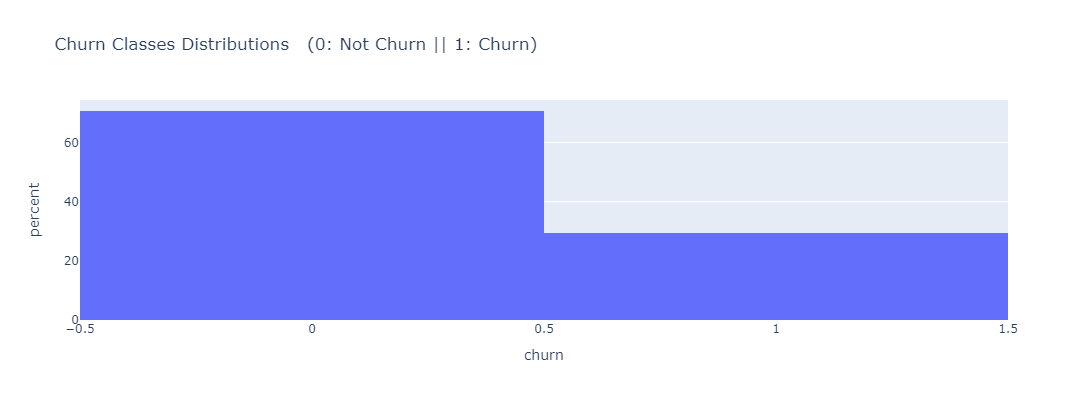

In [125]:
fig = px.histogram(df, x="churn", title='Churn Classes Distributions \n (0: Not Churn || 1: Churn)', histnorm='percent', width=600, height=400)
fig.show()

**Note**: We can see that the number of people who didn't churn accounts for 70.6% of the total, and that for the people who churn accounts for 29.4% of the total. Therefore, this dataset is imbalanced and we will use under-sampling to address this problem

# 3. Explorary Data Analysis

## 3.1. Numerical columns

### Age

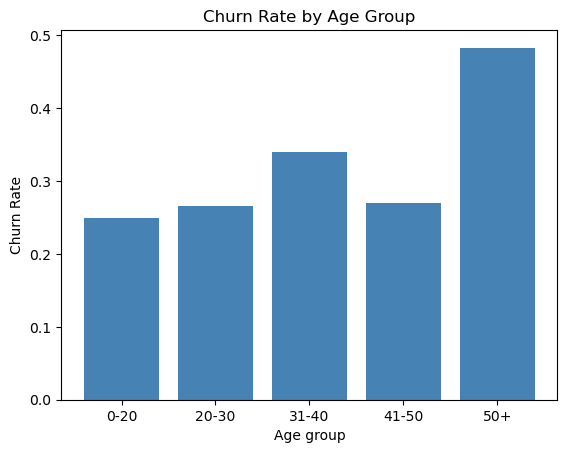

In [126]:
# Create age_group column
df.loc[df["age"] < 20, 'age_group'] = '0-20'
df.loc[(df["age"] >= 20) & (df["age"] <= 30), 'age_group'] = '20-30'
df.loc[(df["age"] >= 31) & (df["age"] <= 40), 'age_group'] = '31-40'
df.loc[(df["age"] >= 41) & (df["age"] <= 50), 'age_group'] = '41-50'
df.loc[df["age"] >= 50, 'age_group'] = '50+'

# Calculate the churn rate by age
churn_rate_by_age_group = df.groupby('age_group')['churn'].mean()

# Create bar chart
plt.bar(churn_rate_by_age_group.index, churn_rate_by_age_group, color='steelblue')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age group')
plt.ylabel('Churn Rate')
plt.show()


**Observations:**
- People at the **age of > 50 will be likely to become churn**. Reason is because they are not farmiliar with the technology 
and also they mostly count on their children. 
- Many people at the age of **31-40 are likely to be churn. This is a paradox** as this age group actually must be one of the
most active group.
- The other three groups **0-20, 20-30 and 41-50 have lower number of being churn**. (approximately from 0.25 to 0.27).

### Saving in March

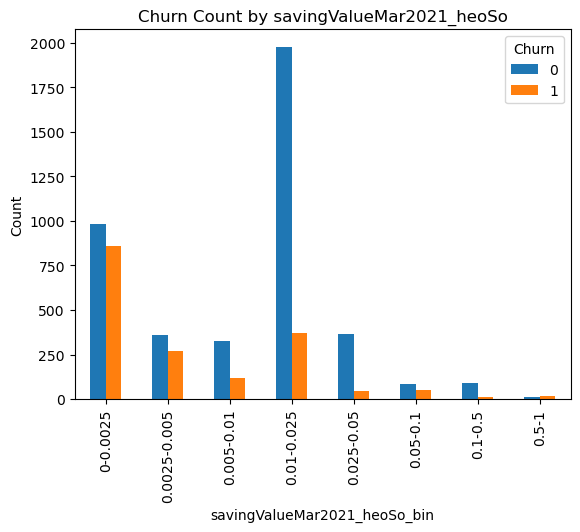

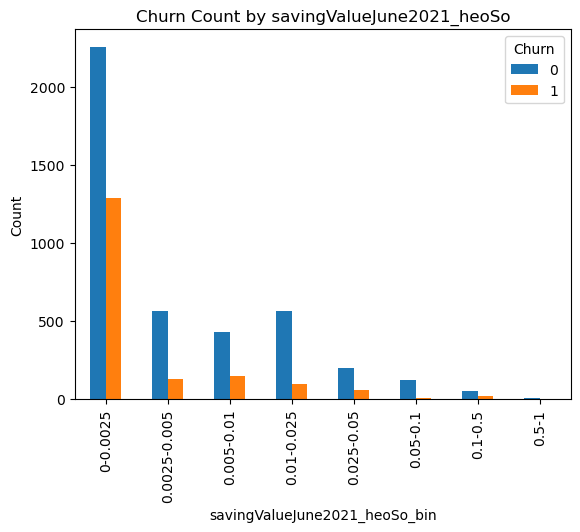

In [127]:
# Define the bins and labels
bins = [0, 0.0025, 0.005, 0.01, 0.025,0.05, 0.1, 0.5, 1]
labels = ['0-0.0025','0.0025-0.005', '0.005-0.01', '0.01-0.025','0.025-0.05', '0.05-0.1', '0.1-0.5', '0.5-1']

# Create the 'savingValueMar2021_heoSo_bin' and 'savingValueJune2021_heoSo_bin' columns
df['savingValueMar2021_heoSo_bin'] = pd.cut(df['savingValueMar2021_heoSo'], bins=bins, labels=labels)
df['savingValueJune2021_heoSo_bin'] = pd.cut(df['savingValueJune2021_heoSo'], bins=bins, labels=labels)

# Count the number of 'churn' values for each bin
counts_mar = df.groupby('savingValueMar2021_heoSo_bin')['churn'].value_counts().unstack()
counts_june = df.groupby('savingValueJune2021_heoSo_bin')['churn'].value_counts().unstack()

# Create bar plots
counts_mar.plot(kind='bar', stacked=False, xlabel='savingValueMar2021_heoSo_bin', ylabel='Count', title='Churn Count by savingValueMar2021_heoSo')
plt.xlabel('savingValueMar2021_heoSo_bin')
plt.ylabel('Count')
plt.title('Churn Count by savingValueMar2021_heoSo')
plt.legend(title='Churn', labels=['0', '1'])


plt.xticks(ticks=np.arange(len(counts_mar.index)), labels=counts_mar.index)

plt.show()

counts_june.plot(kind='bar', stacked=False, xlabel='savingValueJune2021_heoSo_bin', ylabel='Count', title='Churn Count by savingValueJune2021_heoSo')
plt.xlabel('savingValueJune2021_heoSo_bin')
plt.ylabel('Count')
plt.title('Churn Count by savingValueJune2021_heoSo')
plt.legend(title='Churn', labels=['0', '1'])


plt.xticks(ticks=np.arange(len(counts_june.index)), labels=counts_june.index)

plt.show()


**Observations:** 

March plot: 
**The higher the saving amount, the lower the likelihood of churn.** However, at a saving of 0.5-1, the number of people churning is slightly higher.

June plot:
- The number of people with **savings between 0 - 0.0025 are most likely to satisfy the churn condition** (about 1260 people) (both login and saving conditions), however the number of people who are not likely to churn in this range are also quite high (approximately 2086 people) -> churn accounts for about 38% of all savers in the above range.
- The higher the saving amount, the lower the likelihood of churn will be.
- However, savings in the range of 0.005-0.01 have a slightly higher churn amount than savings of 0.0025-0.005.

### Login in March

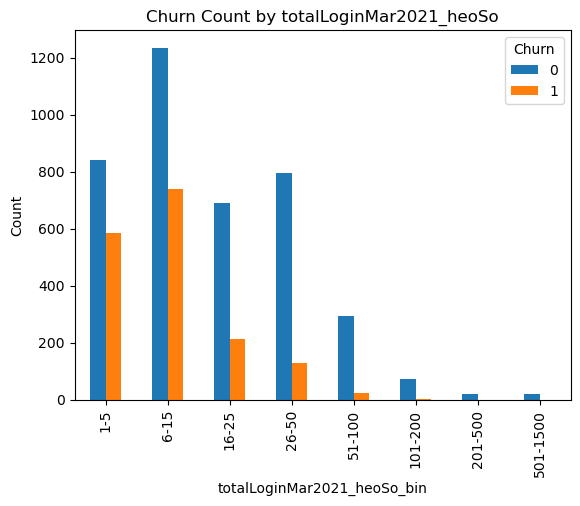

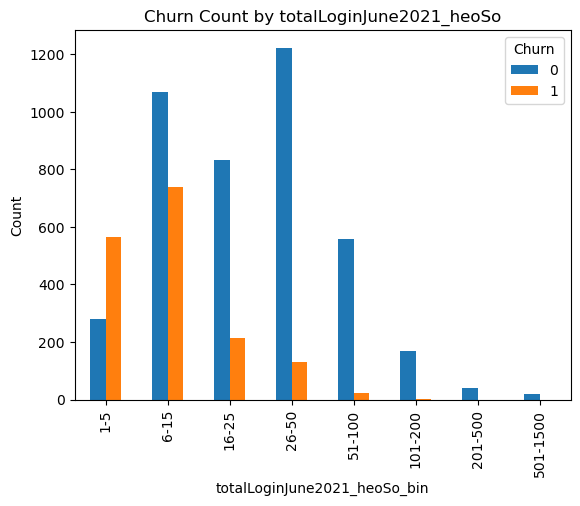

In [128]:
# Define the bins and labels
bins = [1, 5, 15, 25, 50, 100, 200, 500, 1500]
labels = ['1-5', '6-15', '16-25', '26-50', '51-100', '101-200', '201-500', '501-1500']

# Create the 'totalLoginMar2021_heoSo_bin' and 'totalLoginJune2021_heoSo_bin' columns
df['totalLoginMar2021_heoSo_bin'] = pd.cut(df['totalLoginMar2021_heoSo'], bins=bins, labels=labels)
df['totalLoginJune2021_heoSo_bin'] = pd.cut(df['totalLoginJune2021_heoSo'], bins=bins, labels=labels)

# Count the number of 'churn' values for each bin
counts_mar = df.groupby('totalLoginMar2021_heoSo_bin')['churn'].value_counts().unstack()
counts_june = df.groupby('totalLoginJune2021_heoSo_bin')['churn'].value_counts().unstack()

# Create bar plots
counts_mar.plot(kind='bar', stacked=False, xlabel='totalLoginMar2021_heoSo_bin', ylabel='Count', title='Churn Count by totalLoginMar2021_heoSo')
plt.xlabel('totalLoginMar2021_heoSo_bin')
plt.ylabel('Count')
plt.title('Churn Count by totalLoginMar2021_heoSo')
plt.legend(title='Churn', labels=['0', '1'])

plt.xticks(ticks=np.arange(len(counts_mar.index)), labels=counts_mar.index)


plt.show()

counts_june.plot(kind='bar', stacked=False, xlabel='totalLoginJune2021_heoSo_bin', ylabel='Count', title='Churn Count by totalLoginJune2021_heoSo')
plt.xlabel('totalLoginJune2021_heoSo_bin')
plt.ylabel('Count')
plt.title('Churn Count by totalLoginJune2021_heoSo')
plt.legend(title='Churn', labels=['0', '1'])

plt.xticks(ticks=np.arange(len(counts_june.index)), labels=counts_june.index)


plt.show()


**Observations:**

In March:
**The not churn is always higher than the churn.** This is also a paradox though they habe low login time but they are still counted as not churn 

In June:
There is also a paradox here **in 1-5 and 6-15 login total as the lower login time, the higher posibility to be churn**. But the churn people in the 6-15 login time is higher than the people from 1-5 login time group. 
The other months show the normal trend. And the group with the highest not churn people is 25-60 group. 

### Region

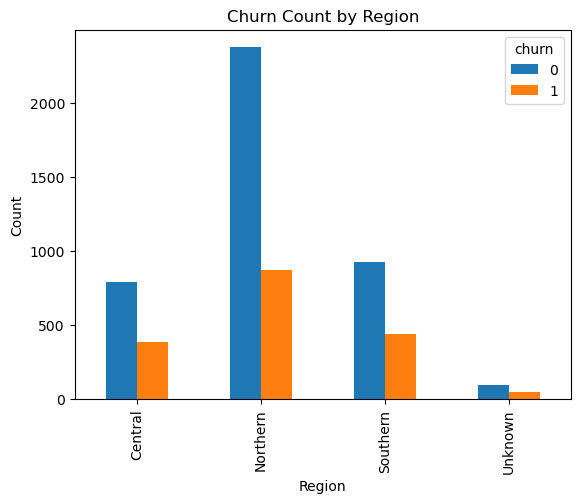

In [129]:
# Define the desired order of 'region' categories
region_order = ['Northern', 'Central', 'Southern', 'Unknown']

# Count the number of 'churn' values for each 'vn_marital_status' category and churn value
churn_count_by_region = df.groupby(['region', 'churn']).size().unstack()

# Create a bar plot
churn_count_by_region.plot(kind='bar', stacked=False)


# Set the x-axis labels to the desired order
plt.xticks(range(len(churn_count_by_region)), churn_count_by_region.index)

# Set the plot title and axis labels
plt.title('Churn Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Show the plot
plt.show()


**Observations:**
- The number of churn is the highest in Northern, following are Southern, Central.
- The Northern is also the region with the lowest portion of the churn compare to not churn (approximately: 33%)
- The Central and the Southern: the churn nearly equals to 1/2 the not churn => Meaning: in 10 people using, there might have 4 people are churn, the portion is pretty high. 

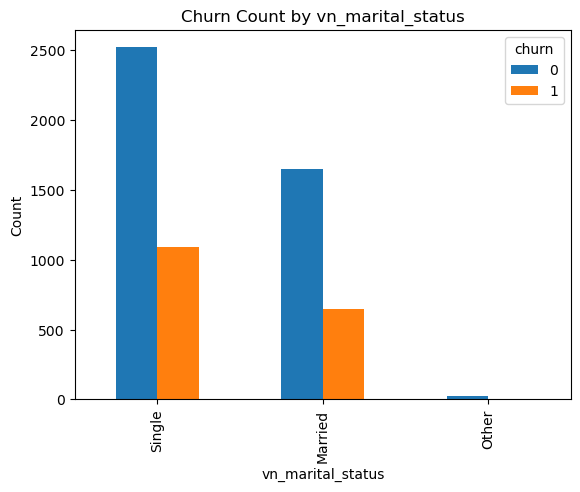

In [130]:
# Define the desired order of 'vn_marital_status' categories
marital_status_order = ['Single', 'Married', 'Other']

# Count the number of 'churn' values for each 'vn_marital_status' category and churn value
churn_count_by_marital_status = df.groupby(['vn_marital_status', 'churn']).size().unstack()

# Reindex the dataframe to the desired order of 'vn_marital_status' categories
churn_count_by_marital_status = churn_count_by_marital_status.reindex(marital_status_order)

# Create a bar plot
churn_count_by_marital_status.plot(kind='bar', stacked=False)


# Set the x-axis labels to the desired order
plt.xticks(range(len(churn_count_by_marital_status)), churn_count_by_marital_status.index)

# Set the plot title and axis labels
plt.title('Churn Count by vn_marital_status')
plt.xlabel('vn_marital_status')
plt.ylabel('Count')

# Show the plot
plt.show()


**Observations:**
- The churn rate of the married is lower than the churn rate of the single. And also the not churn. 
- Comparing the churn and the not churn in the single itself: The amount of churn is approximately 33% of the amount of non-churn. And the same portion with married. 

### Gender

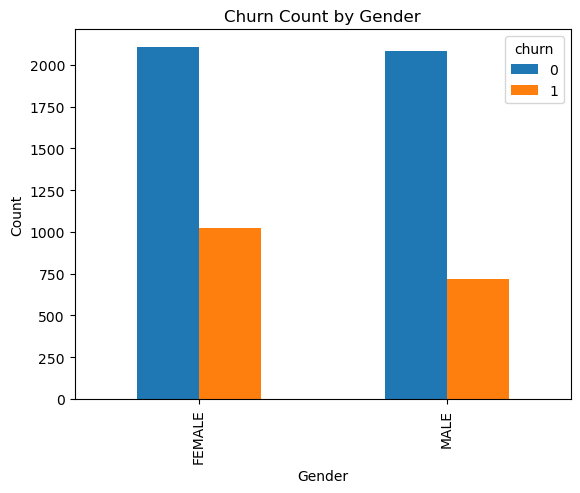

In [131]:
# Count the number of 'churn' values for each 'vn_marital_status' category and churn value
churn_count_by_gender = df.groupby(['local_ref_1', 'churn']).size().unstack()

# Create a bar plot
churn_count_by_gender.plot(kind='bar', stacked=False)


# Set the x-axis labels to the desired order
plt.xticks(range(len(churn_count_by_gender)), churn_count_by_gender.index)

# Set the plot title and axis labels
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


**Observation:**
Male users have less posibility to be churn than female user as the churn rate of the male is lower than female while the not churn is approximatey equal.

## 3.2. Categorical Columns

### Region

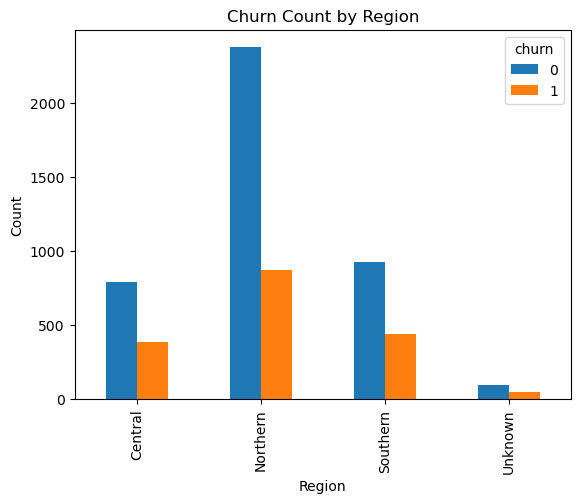

In [132]:
# Define the desired order of 'region' categories
region_order = ['Northern', 'Central', 'Southern', 'Unknown']

# Count the number of 'churn' values for each 'vn_marital_status' category and churn value
churn_count_by_region = df.groupby(['region', 'churn']).size().unstack()

# Create a bar plot
churn_count_by_region.plot(kind='bar', stacked=False)


# Set the x-axis labels to the desired order
plt.xticks(range(len(churn_count_by_region)), churn_count_by_region.index)

# Set the plot title and axis labels
plt.title('Churn Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Show the plot
plt.show()


**Observations:**
- The number of churn is the highest in Northern, following are Southern, Central.
- The Northern is also the region with the lowest portion of the churn compare to not churn (approximately: 33%)
- The Central and the Southern: the churn nearly equals to 1/2 the not churn => Meaning: in 10 people using, there might have 4 people are churn, the portion is pretty high. 

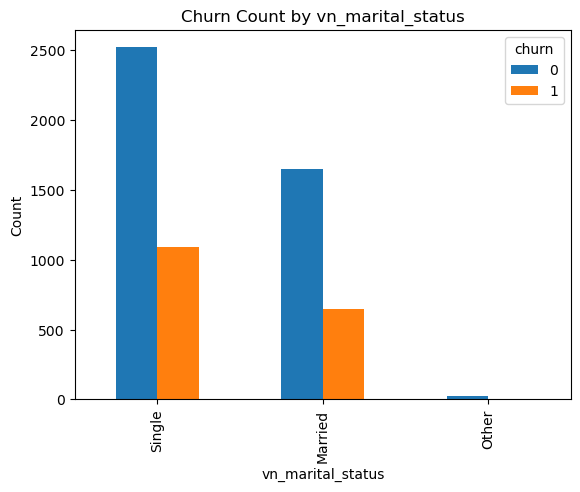

In [133]:
# Define the desired order of 'vn_marital_status' categories
marital_status_order = ['Single', 'Married', 'Other']

# Count the number of 'churn' values for each 'vn_marital_status' category and churn value
churn_count_by_marital_status = df.groupby(['vn_marital_status', 'churn']).size().unstack()

# Reindex the dataframe to the desired order of 'vn_marital_status' categories
churn_count_by_marital_status = churn_count_by_marital_status.reindex(marital_status_order)

# Create a bar plot
churn_count_by_marital_status.plot(kind='bar', stacked=False)


# Set the x-axis labels to the desired order
plt.xticks(range(len(churn_count_by_marital_status)), churn_count_by_marital_status.index)

# Set the plot title and axis labels
plt.title('Churn Count by vn_marital_status')
plt.xlabel('vn_marital_status')
plt.ylabel('Count')

# Show the plot
plt.show()


**Observations:**
- The churn rate of the married is lower than the churn rate of the single. And also the not churn. 
- Comparing the churn and the not churn in the single itself: The amount of churn is approximately 33% of the amount of non-churn. And the same portion with married. 

### Gender

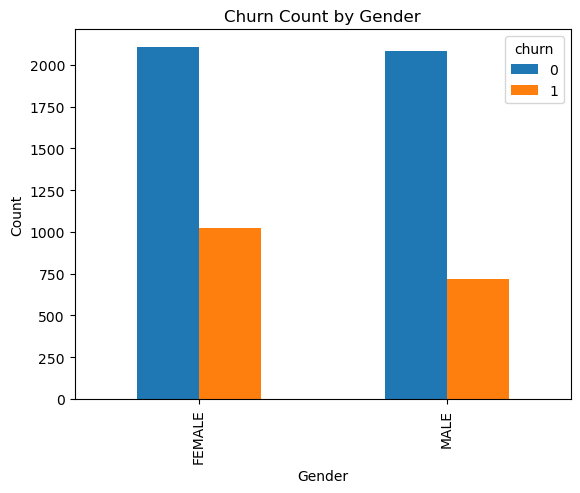

In [134]:
# Count the number of 'churn' values for each 'vn_marital_status' category and churn value
churn_count_by_gender = df.groupby(['local_ref_1', 'churn']).size().unstack()

# Create a bar plot
churn_count_by_gender.plot(kind='bar', stacked=False)


# Set the x-axis labels to the desired order
plt.xticks(range(len(churn_count_by_gender)), churn_count_by_gender.index)

# Set the plot title and axis labels
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


**Observation:**
Male users have less posibility to be churn than female user as the churn rate of the male is lower than female while the not churn is approximatey equal.

### Most type of transactions used in March and June

In [135]:
#find the unique values
cols = ['local_ref_1','vn_marital_status','most_act_mar2021','most_act_june2021']
for col in cols:
    unique_values = df[col].unique()
    print(unique_values)

['FEMALE' 'MALE']
['Married' 'Single' 'Other']
['Giao dich chuyen khoan' 'GIAO DICH TIET KIEM' 'Giao dich thanh toan'
 'GIAO DICH RUT TIEN ATM' 'GIAO DICH PHI TAI CHINH' 'GIAO DICH THANH TOAN']
['Giao dich chuyen khoan' 'Giao dich thanh toan' 'GIAO DICH RUT TIEN ATM'
 'GIAO DICH TIET KIEM' 'GIAO DICH PHI TAI CHINH' 'GIAO DICH THANH TOAN']


**Note:** there are two unique but the same meaning values: Giao dich thanh toan and GIAO DICH THANH TOAN

In [136]:
df['most_act_mar2021'] = df['most_act_mar2021'].replace('Giao dich thanh toan', 'GIAO DICH THANH TOAN')
df['most_act_june2021'] = df['most_act_june2021'].replace('Giao dich thanh toan', 'GIAO DICH THANH TOAN')

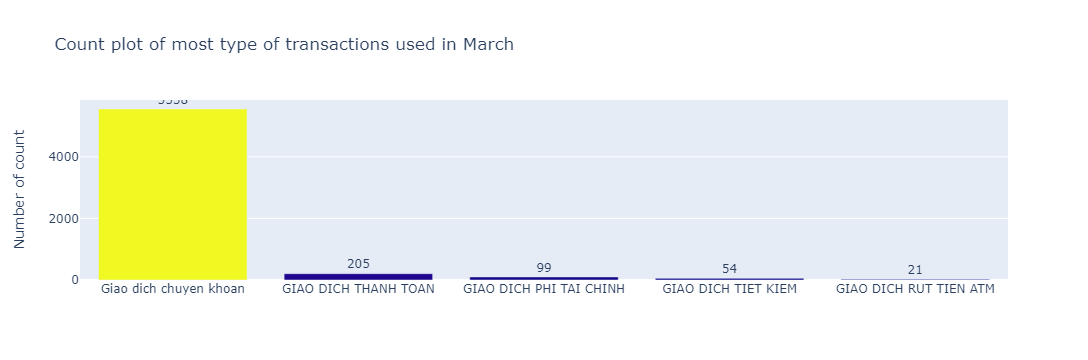

In [137]:
#most_act_mar2021
most_act_count3 = df['most_act_mar2021'].value_counts().reset_index().rename(columns={'index':'index','most_act_mar2021':'count'})
fig = go.Figure(go.Bar(
    x = most_act_count3['index'],y = most_act_count3['count'],text=most_act_count3['count'],marker={'color': most_act_count3['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of most type of transactions used in March ',yaxis_title="Number of count")
fig.show()

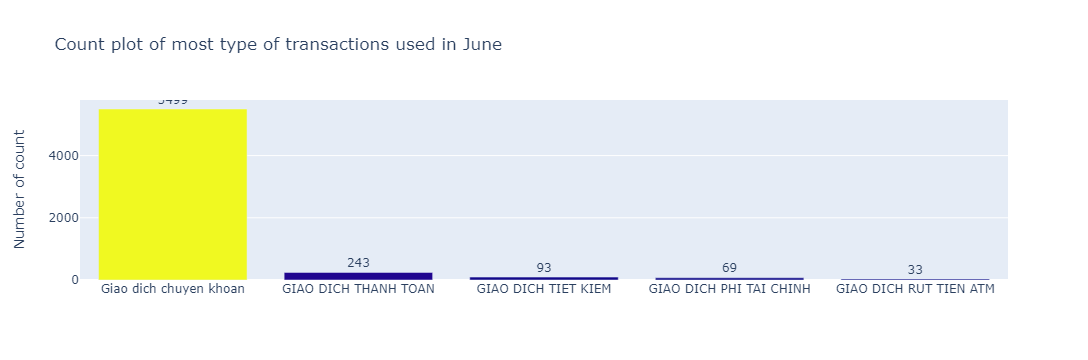

In [138]:
#most_act_june2021
most_act_count6 = df['most_act_june2021'].value_counts().reset_index().rename(columns={'index':'index','most_act_june2021':'count'})
fig = go.Figure(go.Bar(
    x = most_act_count6['index'],y = most_act_count6['count'],text=most_act_count6['count'],marker={'color': most_act_count6['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of most type of transactions used in June ',yaxis_title="Number of count")
fig.show()

**Observation:** we can see that in March and June, the type of transactions that is used the most is Giao dich chuyen khoan.

# 4. Data Preprocessing

### Outlier Handling

In [139]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_columns = num_columns.drop('totalSavings2021_heoSo')

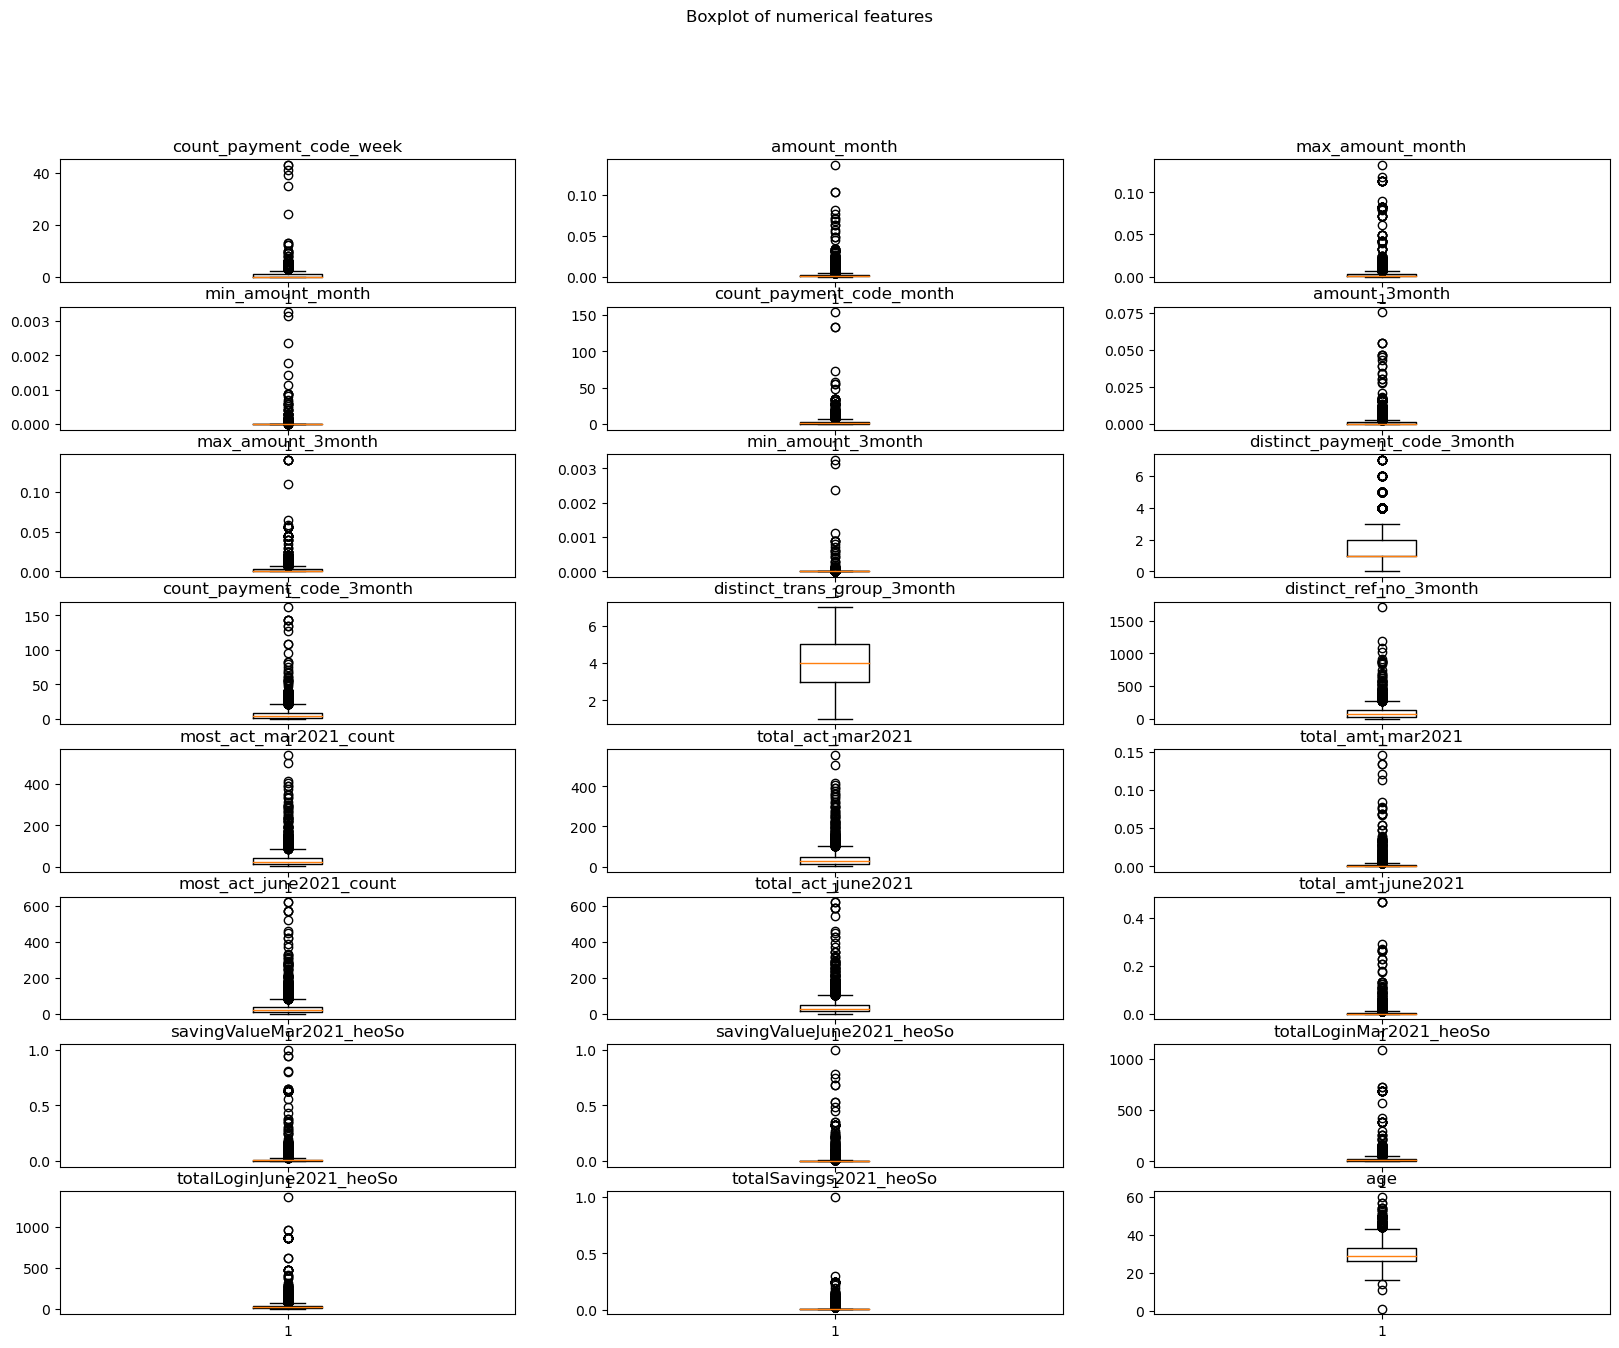

In [140]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
fig, axs = plt.subplots(8, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].boxplot(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1
fig.suptitle('Boxplot of numerical features')
plt.show()

In [141]:
len (df[df['age'] <10 ] ) / len(df) * 100

0.01684352366515075

In [142]:
len (df[df['count_payment_code_week'] > 40] ) / len(df) * 100

0.05053057099545225

In [143]:
len (df[df['count_payment_code_month'] > 150] ) / len(df) * 100

0.01684352366515075

In [144]:
len (df[df['total_act_mar2021'] > 450] ) / len(df) * 100

0.0336870473303015

In [145]:
len (df[df['total_act_june2021'] > 600] ) / len(df) * 100

0.0336870473303015

**Note:** The percentage of possible outliers is quite low so we will drop those values

In [146]:
def get_correct_values(row, column_name, threshold, df):
    ''' Return the mean value if the value in the column is bigger than threhold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean
#Replace incorrect values and remove original columns, columns created for analyzing the impact of features on y
df['age_cleaned'] = df.apply(lambda row: get_correct_values(row, 'age', 59, df),axis=1)
df['count_payment_code_week_cleaned'] = df.apply(lambda row: get_correct_values(row, 'count_payment_code_week', 40, df),axis=1)
df['count_payment_code_month_cleaned'] = df.apply(lambda row: get_correct_values(row, 'count_payment_code_month', 150, df),axis=1)
df['total_act_mar2021_cleaned'] = df.apply(lambda row: get_correct_values(row, 'total_act_mar2021', 450, df),axis=1)
df['total_act_june2021_cleaned'] = df.apply(lambda row: get_correct_values(row, 'total_act_june2021', 600, df),axis=1)

df = df.drop(columns = ['count_payment_code_week', 'count_payment_code_month','total_act_mar2021','total_act_june2021'])  

In [147]:
mean_age = df[df['age'] < 10]['age'].mean()
df['age_cleaned'] = df['age'].where(df['age'] >= 10, mean_age)

In [148]:
df = df.drop(['age','age_group','savingValueMar2021_heoSo_bin','savingValueJune2021_heoSo_bin','totalLoginMar2021_heoSo_bin','totalLoginJune2021_heoSo_bin'], axis = 1)

### Encode Categorical columns

In [149]:
cat_columns = ['local_ref_1', 'vn_marital_status', 'most_act_mar2021','most_act_june2021', 'region']
for col in  cat_columns:
        df = pd.concat([df.drop(col, axis=1),
                                pd.get_dummies(df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)

# 5. Predictive Modeling

### Summary: 
In this part we will firstly split the dataset into the training set and the test set, then use scaler, and random under-sampling to balance the dataset. After using several classification models, we decided to **choose Logistic Regression and Gradient Boosting Claasifier for the next step: model tuning**. From the learning curve plotted out, we found that **the curve from Gradient Boosting perform better and prove to be generalize better to new data** as well. Finally, we test the 2 models on the test set. 
Also, we choose **Recall as the metric to measure the performance of models** because it indicates the proportion of positive results yielded by the model by the total number of positive labels in the dataset. In this case, the Recall reveals the proportion of churns identified correctly by the total number of churns. We prefer to have a model that does not miss any churns but sometimes classify a non-churns as churns, than a model that does not classify non-churns as churns but misses a lot of churns.

## 5.1. Split the dataset

In [150]:
X = df.drop(['churn'], axis=1)
y = df['churn']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

## 5.2. Robust Scaler

In [151]:
from sklearn.preprocessing import RobustScaler
# Scale only the columns that are not 'totalSavings2021_heoSo'
cols_to_scale = [col for col in X.columns if col != 'totalSavings2021_heoSo']
scaler = RobustScaler()
original_Xtrain[cols_to_scale] = scaler.fit_transform(original_Xtrain[cols_to_scale])
original_Xtest[cols_to_scale] = scaler.transform(original_Xtest[cols_to_scale])

## 5.3. Random Under-sampling

In [152]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy = 'majority', random_state = 1)
X_downsampled, y_downsampled = undersample.fit_resample(original_Xtrain, original_ytrain)

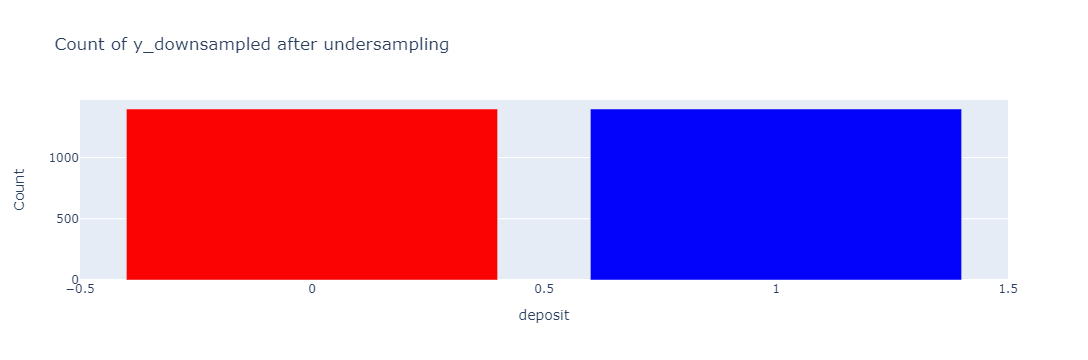

In [153]:
import plotly.graph_objects as go
unique, counts = np.unique(y_downsampled, return_counts=True)

colors = [ '#fc0303', '#0303fc']

fig = go.Figure([go.Bar(x=unique, y=counts, marker_color=colors)])
fig.update_layout(title='Count of y_downsampled after undersampling',
                  xaxis_title='deposit',
                  yaxis_title='Count')
fig.show()

In [154]:
#dividing into train and test set in undersampling
X_un_train, X_un_test, y_un_train, y_un_test = train_test_split(
    X_downsampled, y_downsampled, test_size=0.2, random_state=42)

## 5.3. Classification models

In [155]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}
n_folds = 5
results = []
for name, model in dict_classifiers.items():
    # Calculate cross-validated recall
    recall = cross_val_score(model,X_un_train, y_un_train, cv=n_folds, scoring='recall')
    
    results.append({
        'Model': name,
        'Recall': recall.mean()
    })

results_df = pd.DataFrame(results)
results_df

,Model,Recall
0,Logistic Regression,0.974198
1,Nearest Neighbors,0.777560
2,Linear SVM,0.914607
3,Gradient Boosting Classifier,0.935940
4,Decision Tree,0.884345
5,Random Forest,0.867433
6,Neural Net,0.944845
7,Naive Bayes,0.850524


### Model tuning for downsampling

In [60]:
# Gradient Boosting Classifier
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1,0.01,0.001],'loss':['log_loss', 'deviance', 'exponential'],'tol': [0.001, 0.01]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), gb_params)
grid_gb.fit(X_un_train, y_un_train)
gb = grid_gb.best_estimator_

# Logistic Regression 
lr_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), lr_params)
grid_log_reg.fit(X_un_train, y_un_train)
lr = grid_log_reg.best_estimator_

In [68]:
gb_score = cross_val_score(gb, X_un_train, y_un_train, cv=5,scoring = 'recall')
print('Gradient Boosting Classifier after tuning score:', round(gb_score.mean() * 100, 2).astype(str) + '%')

log_reg_score = cross_val_score(lr, X_un_train, y_un_train, cv=5,scoring = 'recall')
print('Logistic Regression after tuning score:', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


Gradient Boosting Classifier after tuning score: 94.93%
Logistic Regression after tuning score: 98.31%


In [62]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(
        estimator1, 
        estimator2, 
        X, 
        y, 
        ylim=None, 
        cv=None, 
        train_sizes=np.linspace(0.1, 1.0, 5)
    ) -> None:

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # Logis
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Gradient Boosting
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Gradient Boosting Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

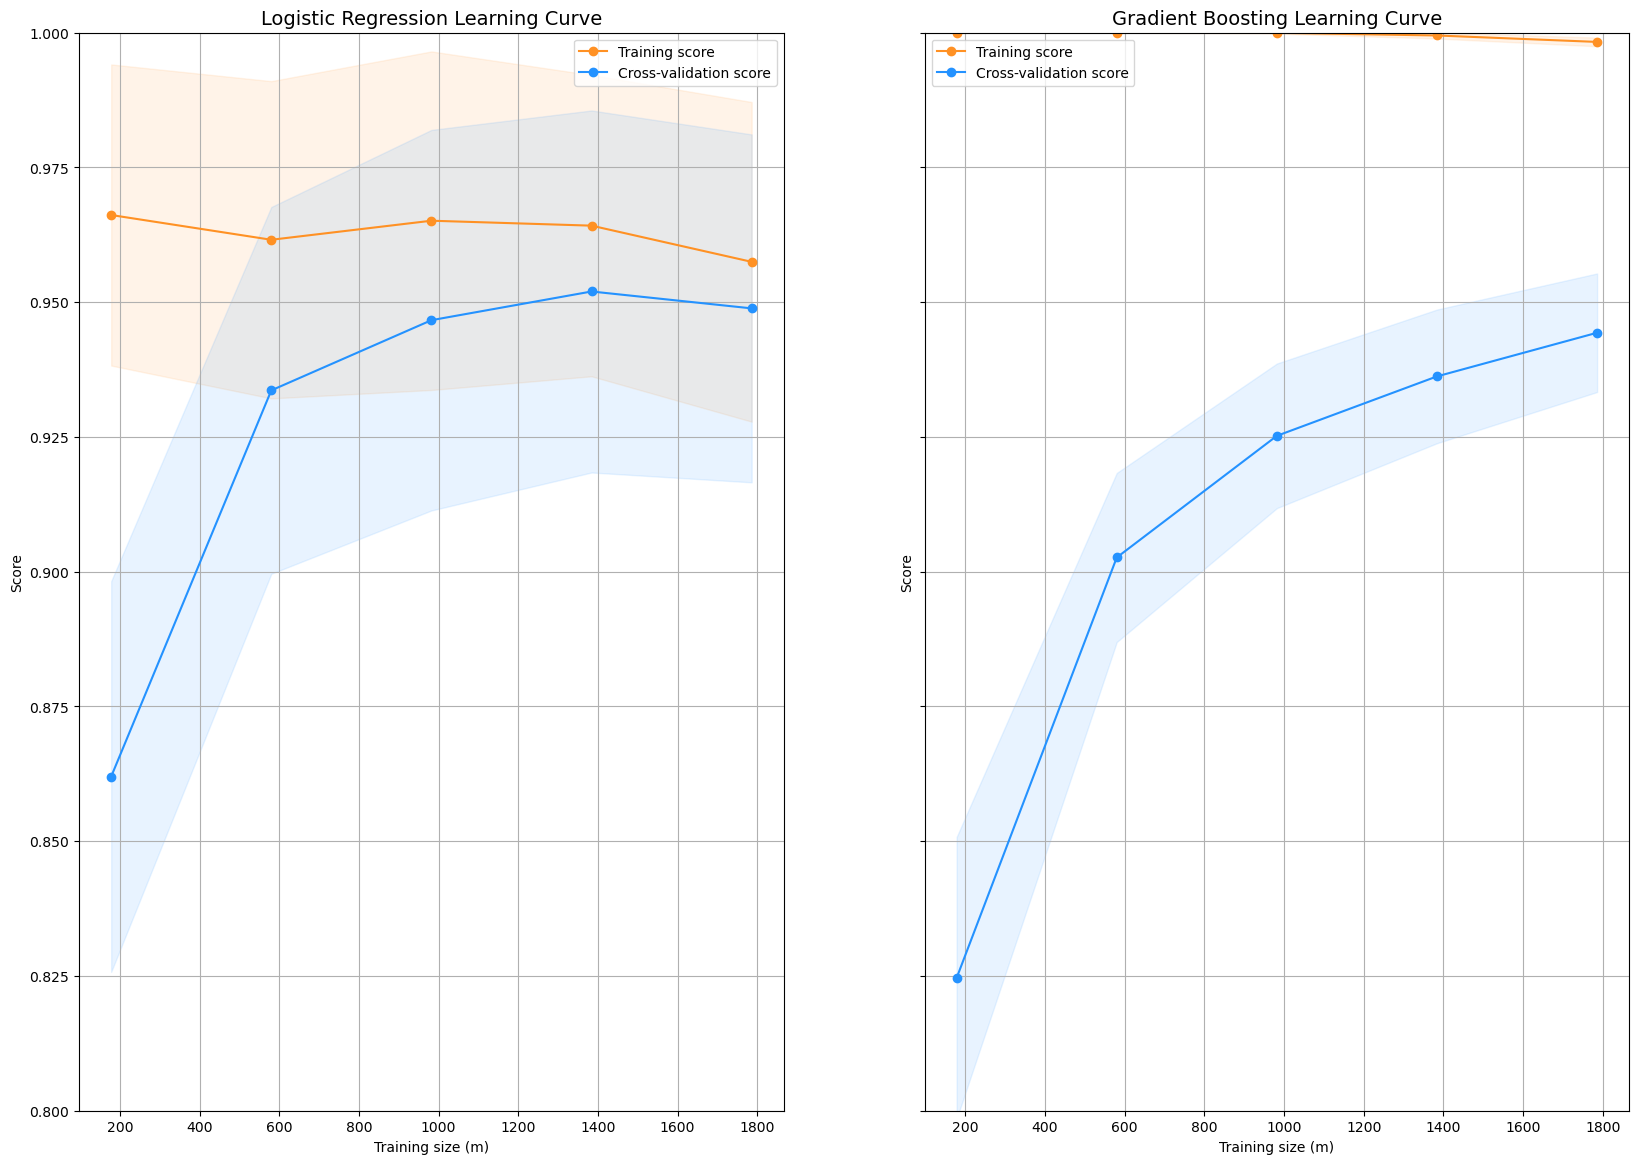

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(lr, gb, X_un_train, y_un_train, (0.8, 1), cv=cv)
plt.show()

For the **Logistic Regression learning curve**, even though the **generalization gap is smaller** than that for Gradient Boosting learning curve, however,  the **cross-validation score is decreasing and the 2 curves are becoming parallel**.
For the **Gradient Boosting learning curve**, the generalization gap is about 0.05 and the cross-validation score is increasing as well, so we can see that it has more potential to **generalize to new data better**.

In [64]:
# Logistic Regression with Under-Sampling
#original_Xtest = original_Xtest[selected_features]
y_pred_lr = lr.predict(original_Xtest)
undersample_score_lr = recall_score(original_ytest, y_pred_lr)

# Gradient Boosting with Under-Sampling
y_pred_gb = gb.predict(original_Xtest)
undersample_score_gb = recall_score(original_ytest, y_pred_gb)

d = {'Classifier': ['Logistic Regression', 'Gradient Boosting Classifier'], 'Recall': [undersample_score_lr, undersample_score_gb]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Recall']
final_df.drop('Recall', axis=1, inplace=True)
final_df.insert(1, 'Recall', score)

final_df

,Classifier,Recall
0,Logistic Regression,0.994269
1,Gradient Boosting Classifier,0.957020


# 6. Feature Importance and recommendation for the bank

## 6.1. Feature Importance

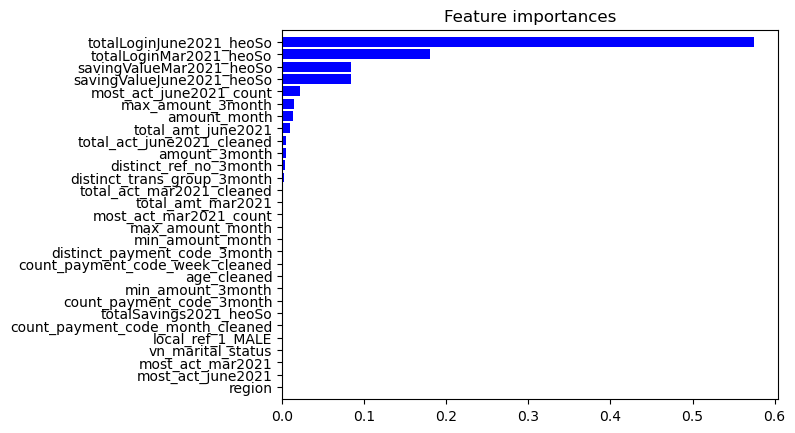

In [245]:
# Assume that 'model' is a trained tree-based model such as a random forest classifier
feature_cols = df.drop('churn', axis=1).columns

clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)
clf.fit(original_Xtrain, original_ytrain)
# Get the feature importances
importances = clf.feature_importances_

# Define a mapping from encoded column names to original categorical column names
encoded_to_original = {
    'region_Northern': 'region',
    'region_Southern': 'region',
    'region_Unknown': 'region',
    'vn_marital_status_Other': 'vn_marital_status', 
    'vn_marital_status_Single': 'vn_marital_status',
    'most_act_mar2021_GIAO DICH RUT TIEN ATM': 'most_act_mar2021',
    'most_act_mar2021_GIAO DICH THANH TOAN': 'most_act_mar2021',
    'most_act_mar2021_GIAO DICH TIET KIEM': 'most_act_mar2021',
    'most_act_mar2021_Giao dich chuyen khoan': 'most_act_mar2021',
    'most_act_june2021_GIAO DICH RUT TIEN ATM': 'most_act_june2021',
    'most_act_june2021_GIAO DICH THANH TOAN': 'most_act_june2021',
    'most_act_june2021_GIAO DICH TIET KIEM': 'most_act_june2021',
    'most_act_june2021_Giao dich chuyen khoan': 'most_act_june2021'
}

# Aggregate the feature importances of the encoded columns
original_importances = {}
for col, imp in zip(feature_cols, importances):
    if col in encoded_to_original:
        original_col = encoded_to_original[col]
        if original_col not in original_importances:
            original_importances[original_col] = 0.0
        original_importances[original_col] += imp
    else:
        original_importances[col] = imp

# Sort the feature importances in descending order
sorted_importances = sorted(original_importances.items(), key=lambda x: x[1], reverse=True)

# Plot the feature importances as a horizontal bar chart
plt.figure()
plt.title("Feature importances")
plt.barh(range(len(sorted_importances)), [x[1] for x in sorted_importances], color="b", align="center")
plt.yticks(range(len(sorted_importances)), [x[0] for x in sorted_importances])
plt.ylim([-1, len(sorted_importances)])
plt.gca().invert_yaxis()
plt.show()

4 features that are consider to be strongly effect the churn rate are: 
Total login June
Total login March 
Saving value March 
Saving value June
These variables are which we have used above to defind dependant variable and to find insights. 

## 6.2. Recommendations for the bank

1. The bank should **focus on finding reasons of people easy become churn just in 3 months.**
2. The **group of people should focus on: at the age of < 50.** Find out the reasons leading to the group 31-40 has more posibility to be churn than other (their behaviour, the approaching to new saving technique,...). 
3. Moreover, **the group of married people are alo potential**, they can consider using Heo so as a very first step of teaching theỉ kid how to save money. And to the **single group peope**, their mostly focus on long term investment or high risk, high return then we need to **focus on changing the perception** as they can use Heo so as a passive backup saving for pop up situation. 


# 7. References
1. https://www.kaggle.com/code/thomaskonstantin/bank-churn-data-exploration-and-churn-prediction
2. https://www.kaggle.com/code/rpsuraj/classifying-credit-card-defaulters-deployment#5)-Model-Building: